In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib 

In [3]:
df=pd.read_csv("data/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [17]:
def plot_features(feature:str)->None:
    """This Function Helps to Plot each featrues of Flower with its species

    Args:
        feature (str): featrue of flower
    Return:
        None
    > plots Graph
    """
    sns.scatterplot(data=df, x="Sales", y=feature, hue="Sales", palette="viridis")
    plt.xlabel("Sales")
    plt.ylabel(feature)
    plt.show()

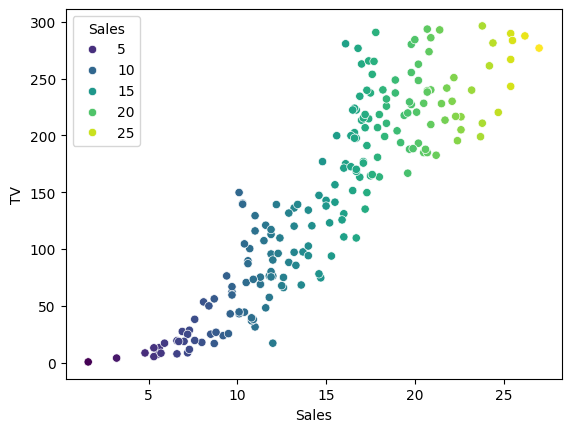

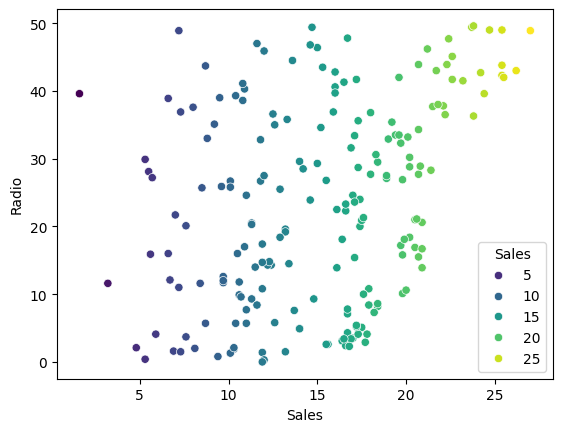

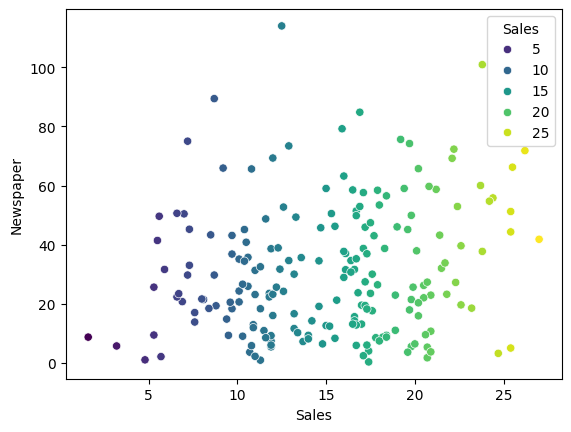

In [18]:
cols = list(df.columns)

for col in cols:
    if col == "Sales":
        break
    plot_features(feature=col)

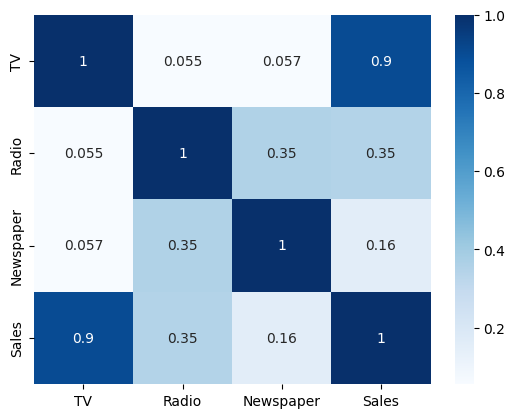

In [19]:
corrMatrix = df.corr()
corrMatrix
sns.heatmap(corrMatrix,annot=True, cmap="Blues");

In [9]:
X=df.drop(columns="Sales")
y=df["Sales"]
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [10]:

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
model.score(X_test,y_test)


0.9174376432816378

In [20]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9633061088023075

In [22]:
joblib.dump(model,"./model/Sales_prediction.joblib")

['./model/Sales_prediction.joblib']